In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train),(x_test,y_test) = datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

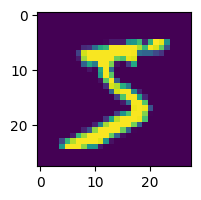

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

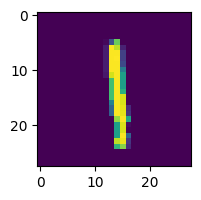

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[8])

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

# ANN classification

In [13]:
import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2805 - accuracy: 0.9199
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1248 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9795


[0.08117258548736572, 0.9794999957084656]

In [17]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

# cNN

In [18]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 17ms/step - loss: 0.1671 - accuracy: 0.9508
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0195 - accuracy: 0.9935


In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9846


[0.053720880299806595, 0.9846000075340271]

In [22]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [23]:
y_pred

array([[4.67601791e-02, 3.86151075e-02, 7.32938349e-01, ...,
        9.99995470e-01, 1.05110407e-01, 9.90361571e-02],
       [5.31709552e-01, 6.43859133e-02, 9.99999881e-01, ...,
        8.35506512e-07, 1.76905900e-01, 3.66355322e-04],
       [2.30525061e-02, 9.99988735e-01, 1.48466425e-02, ...,
        4.98718798e-01, 1.68625757e-01, 4.07642266e-03],
       ...,
       [7.56205339e-03, 1.35181639e-02, 1.93233788e-02, ...,
        7.15096146e-02, 9.67903852e-01, 7.06581950e-01],
       [7.29816779e-03, 5.64669911e-03, 1.75864884e-07, ...,
        9.61010996e-03, 9.47853804e-01, 1.01317419e-03],
       [1.85826764e-01, 1.24902511e-03, 6.15768041e-03, ...,
        8.06976968e-05, 2.12047443e-01, 3.64228508e-05]], dtype=float32)

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
#y_pred_classes

print('classification Report:\n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 5ms/step
classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

